In [9]:
# 从数据库中获取数据
from scripts_stock.data_base.get_table_info import GetDataFromDB

# 获取表明
from scripts_stock.data_base.cfg import DBTableName 

# 获取数据测试脚本
from scripts_stock.utils.common import CommonScript
import pandas as pd
import numpy as np

conn = CommonScript.connect_to_db("test.db")
# input_sql_str = f"select * from r_t_fin_report limit 10"
# df1 = pd.read_sql_query(input_sql_str, conn)

In [4]:

raw_col = ['SECURITY_CODE', 'SECURITY_NAME_ABBR', 'TRADE_MARKET_CODE',
           'TRADE_MARKET', 'SECURITY_TYPE_CODE', 'SECURITY_TYPE', 'UPDATE_DATE',
           'REPORTDATE', 'BASIC_EPS', 'DEDUCT_BASIC_EPS', 'TOTAL_OPERATE_INCOME',
           'PARENT_NETPROFIT', 'WEIGHTAVG_ROE', 'YSTZ', 'SJLTZ', 'BPS', 'MGJYXJJE',
           'XSMLL', 'YSHZ', 'SJLHZ', 'ASSIGNDSCRPT', 'PAYYEAR', 'PUBLISHNAME',
           'ZXGXL', 'NOTICE_DATE', 'ORG_CODE', 'TRADE_MARKET_ZJG', 'ISNEW',
           'QDATE', 'DATATYPE', 'DATAYEAR', 'DATEMMDD', 'EITIME', 'SECUCODE']

col_name = [
    "stock_index","stock_name", "TRADE_MARKET_CODE","TRADE_MARKET",
    "SECURITY_TYPE_CODE", "SECURITY_TYPE","UPDATE_DATE","REPORTDATE",
    "每股收益", "DEDUCT_BASIC_EPS", "营业总收入", "净利润",
    "净资产收益率", "营业总收入同比增长率",
    "净利润同比增长率", "每股净资产", "每股经营现金流", "销售毛利率","营业总收入季度环比增长", "净利润季度环比增长",
    "分红", "PAYYEAR", "行业", "ZXGXL", "NOTICE_DATE","ORG_CODE","TRADE_MARKET_ZJG",
    "ISNEW","QDATE", "DATATYPE",
    "DATAYEAR","DATEMMDD",
    "EITIME","SECUCODE"
]
col_df = pd.DataFrame([col_name, raw_col]).T
col_df

,0,1
0,stock_index,SECURITY_CODE
1,stock_name,SECURITY_NAME_ABBR
2,TRADE_MARKET_CODE,TRADE_MARKET_CODE
3,TRADE_MARKET,TRADE_MARKET
4,SECURITY_TYPE_CODE,SECURITY_TYPE_CODE
5,SECURITY_TYPE,SECURITY_TYPE
6,UPDATE_DATE,UPDATE_DATE
7,REPORTDATE,REPORTDATE
8,每股收益,BASIC_EPS
9,DEDUCT_BASIC_EPS,DEDUCT_BASIC_EPS


In [18]:
input_sql_str = f"""select SECURITY_CODE as stock_index,
SECURITY_NAME_ABBR as stock_name,
TRADE_MARKET,
BASIC_EPS as 每股收益,
PARENT_NETPROFIT as 净利润,
BPS as 每股净资产,
XSMLL as 销售毛利率,
DATATYPE,
REPORTDATE
 from r_t_fin_report 
 where (TRADE_MARKET='上交所主板'
 or TRADE_MARKET='深交所主板') 
"""
df1 = pd.read_sql_query(input_sql_str, conn)
df2 = df1.sort_values("REPORTDATE").reset_index(drop=True)
df2.head(10)

,stock_index,stock_name,TRADE_MARKET,每股收益,净利润,每股净资产,销售毛利率,DATATYPE,REPORTDATE
0,600602,云赛智联,上交所主板,0.0100,10869047.66,2.049224,12.688119,2013年 一季报,2013-03-31 00:00:00
1,2163,海南发展,深交所主板,-0.0500,-43954606.84,1.640559,9.266296,2013年 一季报,2013-03-31 00:00:00
2,2170,芭田股份,深交所主板,0.0470,40269480.99,2.983012,17.491761,2013年 一季报,2013-03-31 00:00:00
3,2181,粤传媒,深交所主板,0.0803,55541868.52,5.285772,34.984811,2013年 一季报,2013-03-31 00:00:00
4,2190,成飞集成,深交所主板,0.0330,11291170.90,4.598647,24.643616,2013年 一季报,2013-03-31 00:00:00
5,2196,方正电机,深交所主板,0.0369,5506735.68,2.634732,18.445467,2013年 一季报,2013-03-31 00:00:00
6,2201,正威新材,深交所主板,0.0100,2125389.85,2.387692,21.881556,2013年 一季报,2013-03-31 00:00:00
7,2203,海亮股份,深交所主板,0.0789,61035147.29,3.556868,5.222230,2013年 一季报,2013-03-31 00:00:00
8,2216,三全食品,深交所主板,0.1400,54481799.22,8.598836,33.870000,2013年 一季报,2013-03-31 00:00:00
9,2218,拓日新能,深交所主板,0.0076,3718527.94,2.924195,23.988594,2013年 一季报,2013-03-31 00:00:00


In [73]:
dff1 = df2.loc[(df2["销售毛利率"] > 50)&(df2["REPORTDATE"] > '2023'), ["stock_index","stock_name","销售毛利率","DATATYPE"]].drop_duplicates()
dff1.sort_values("销售毛利率",ascending=False)

,stock_index,stock_name,销售毛利率,DATATYPE
118485,600053,九鼎投资,99.719921,2023年 三季报
124504,567,海德股份,99.578461,2024年 一季报
122440,600053,九鼎投资,99.553565,2023年 年报
126819,567,海德股份,99.310980,2024年 半年报
132463,567,海德股份,98.929211,2024年 三季报
...,...,...,...,...
120237,601001,晋控煤业,50.047516,2023年 年报
129332,601579,会稽山,50.036463,2024年 半年报
112667,600032,浙江新能,50.028216,2023年 一季报
128125,601000,唐山港,50.018883,2024年 半年报


In [29]:
stock_index_list = df2["stock_index"].unique().tolist()
dd = df2[df2["stock_index"]==601398]
dd["stock_name"].values[0]

'工商银行'

In [99]:
ind_in = ['每股收益', '净利润', '销售毛利率', '每股净资产']
stock_ind_list = []
stock_name_list = []
slope_list = []
quater_count = []
ind_in_list = []
for i in stock_index_list:
    for j in ind_in:
        df3 = df2[df2["stock_index"] == i].sort_values("REPORTDATE").reset_index(drop=True)
        if df3.shape[0] >= 16 and df3["销售毛利率"].min()>20:
            slope, intercept = np.polyfit(
                df3.index, df3[j]/df3[j].max(), 1)
            stock_ind_list.append(i)
            slope_list.append(slope)
            stock_name_list.append(df3["stock_name"].values[0])
            quater_count.append(df3.shape[0])
            ind_in_list.append(j)

In [38]:
df2.shape

(132729, 9)

In [100]:
dd1 = pd.DataFrame([stock_ind_list, stock_name_list, slope_list, quater_count,ind_in_list ]).T
dd1.columns = ["stock_index","stock_name","slope","quater_cnt","indicator_name"]

In [101]:
dd2 = dd1[(dd1["indicator_name"] == '每股收益') & (dd1['slope'] > 0)].sort_values(
    "slope", ascending=False)
dd2.head(30)

,stock_index,stock_name,slope,quater_cnt,indicator_name
3572,1286,陕西能源,0.038708,16,每股收益
3540,601065,江盐集团,0.032725,16,每股收益
2776,603361,浙江国祥,0.03247,18,每股收益
3460,600938,中国海油,0.024104,18,每股收益
452,597,东北制药,0.022186,47,每股收益
3108,603290,斯达半导,0.018761,28,每股收益
324,600132,重庆啤酒,0.018716,47,每股收益
3224,605123,派克新材,0.0174,25,每股收益
3072,1278,一彬科技,0.0168,24,每股收益
2936,1216,华瓷股份,0.016348,25,每股收益


In [112]:
d_slope1 = dd1.groupby(["stock_index","stock_name"])["slope"].min().reset_index().sort_values("slope")
d_slope2 = d_slope1[d_slope1["slope"]>0]
d_slope2

,stock_index,stock_name,slope
117,2039,黔源电力,0.000056
297,2773,康弘药业,0.000066
837,603939,益丰药房,0.000074
468,600479,千金药业,0.000081
794,603757,大元泵业,0.000107
...,...,...,...
21,568,泸州老窖,0.010662
120,2049,紫光国微,0.010883
544,600976,健民集团,0.011032
853,605028,世茂能源,0.011308


In [104]:
df2[df2["stock_index"]==600900]

,stock_index,stock_name,TRADE_MARKET,每股收益,净利润,每股净资产,销售毛利率,DATATYPE,REPORTDATE
1689,600900,长江电力,上交所主板,0.0301,4.970263e+08,4.575292,36.861608,2013年 一季报,2013-03-31 00:00:00
3533,600900,长江电力,上交所主板,0.1725,2.847065e+09,4.350942,50.408526,2013年 半年报,2013-06-30 00:00:00
5407,600900,长江电力,上交所主板,0.4585,7.565074e+09,4.650921,61.654367,2013年 三季报,2013-09-30 00:00:00
8280,600900,长江电力,上交所主板,0.5450,8.993112e+09,4.738123,57.992804,2013年 年报,2013-12-31 00:00:00
10198,600900,长江电力,上交所主板,0.0386,6.361668e+08,4.759696,39.129328,2014年 一季报,2014-03-31 00:00:00
12303,600900,长江电力,上交所主板,0.2057,3.393314e+09,4.658608,53.363287,2014年 半年报,2014-06-30 00:00:00
15510,600900,长江电力,上交所主板,0.5727,9.449550e+09,5.019833,65.545277,2014年 三季报,2014-09-30 00:00:00
17840,600900,长江电力,上交所主板,0.7170,1.182999e+10,5.220252,63.097884,2014年 年报,2014-12-31 00:00:00
19642,600900,长江电力,上交所主板,0.1143,1.886769e+09,5.327633,45.372205,2015年 一季报,2015-03-31 00:00:00
21797,600900,长江电力,上交所主板,0.3872,7.098665e+09,5.179242,55.606916,2015年 半年报,2015-06-30 00:00:00


In [103]:
dd1[dd1["stock_index"]==600900]

,stock_index,stock_name,slope,quater_cnt,indicator_name
1436,600900,长江电力,0.006647,47,每股收益
1437,600900,长江电力,0.008914,47,净利润
1438,600900,长江电力,0.000515,47,销售毛利率
1439,600900,长江电力,0.008993,47,每股净资产


In [ ]:
dd3.head(2)

,stock_index,stock_name,TRADE_MARKET,每股收益,净利润,每股净资产,销售毛利率,DATATYPE,REPORTDATE
912,927,中国铁物,深交所主板,-0.0364,-58135812.15,2.265261,2.171883,2013年 一季报,2013-03-31 00:00:00
3452,927,中国铁物,深交所主板,0.0029,4581323.68,2.294948,0.532927,2013年 半年报,2013-06-30 00:00:00


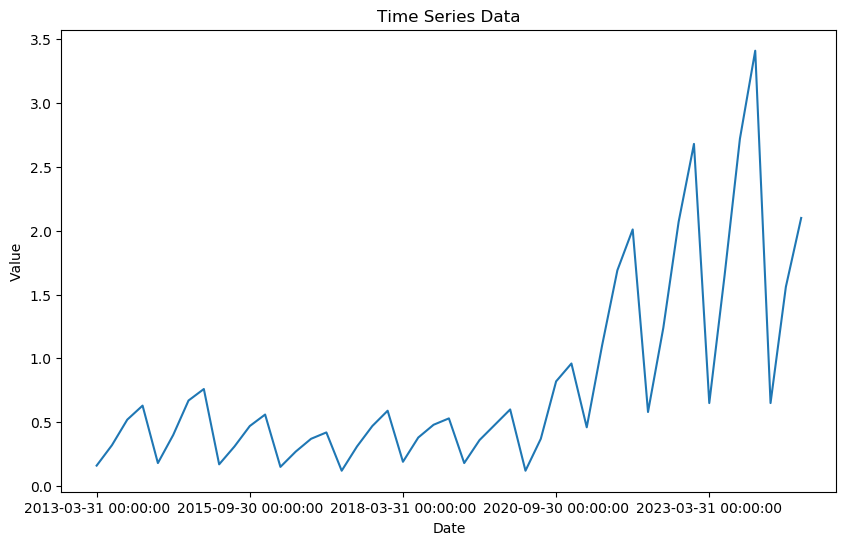

In [114]:
import matplotlib.pyplot as plt
# 将 date 列转换为 datetime 类型，并设置为 DataFrame 的索引
#df2['date'] = pd.to_datetime(df2['date'])
dd3 = df2[df2["stock_index"] == 600976]

dd3.set_index('REPORTDATE', inplace=True)
# 绘制时间序列图
dd3['每股收益'].plot(figsize=(10, 6))

# 添加标题和标签
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')

# 显示图表
plt.show()